In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [30]:
test = pd.read_csv('/Users/youziya/Downloads/test.csv', sep=";")
train = pd.read_csv('/Users/youziya/Downloads/train.csv', sep=";")
df = pd.concat([test,train])

### Data Preprocessing

In [31]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [33]:
df.describe(include = 'all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,49732.000000,49732,49732,49732,49732,49732.000000,49732,49732,49732,49732.000000,49732,49732.000000,49732.000000,49732.000000,49732.000000,49732,49732
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,10678,30011,25508,48841,NaN,27689,41797,32181,NaN,15164,NaN,NaN,NaN,NaN,40664,43922
mean,40.957472,NaN,NaN,NaN,NaN,1367.761562,NaN,NaN,NaN,15.816315,NaN,258.690179,2.766549,40.158630,0.576892,NaN,NaN
std,10.615008,NaN,NaN,NaN,NaN,3041.608766,NaN,NaN,NaN,8.315680,NaN,257.743149,3.099075,100.127123,2.254838,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1431.000000,NaN,NaN,NaN,21.000000,NaN,320.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [34]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [35]:
# drop columns
df.drop(['contact','day','month','pdays','poutcome'], axis=1)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,y
0,30,unemployed,married,primary,no,1787,no,no,79,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,220,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,185,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,199,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,226,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,977,3,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,456,2,0,yes
45208,72,retired,married,secondary,no,5715,no,no,1127,5,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,508,4,0,no


In [36]:
duplicate_rows = df.duplicated(subset=df.columns.difference(['age','y'])) 

In [37]:
num_duplicate_rows = duplicate_rows.sum() 
num_duplicate_rows

4522

In [38]:
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'previous']

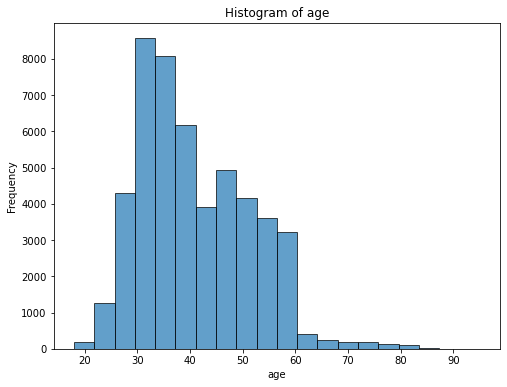

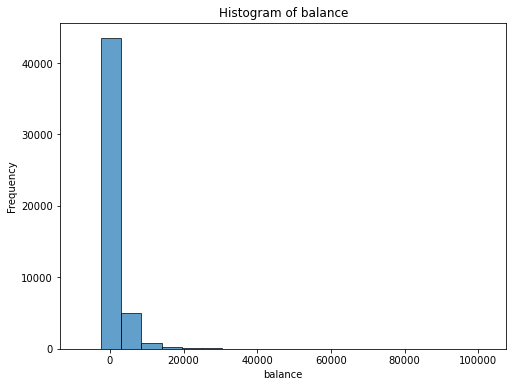

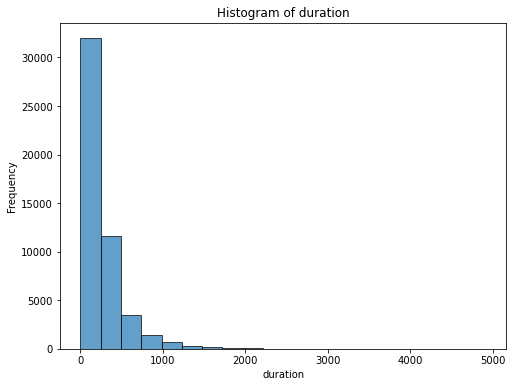

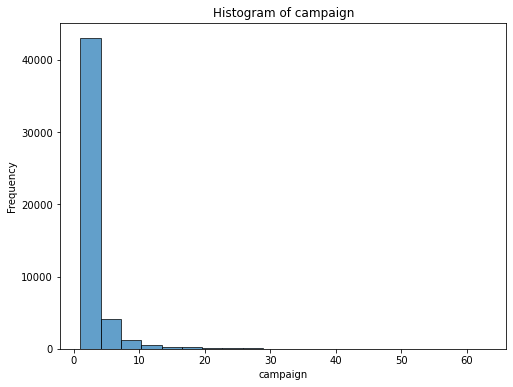

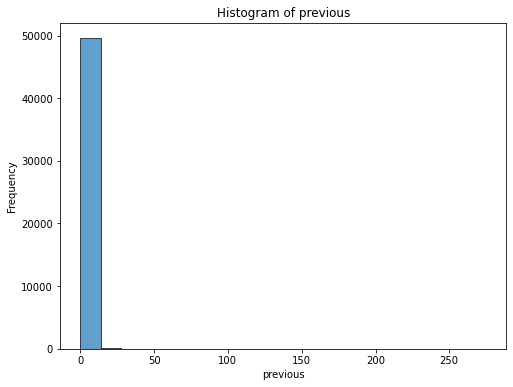

In [39]:
# plot the histogram fo reach numerical columns so we can better make decisions on dropping outliers

# Set the number of bins for the histogram
num_bins = 20

# Plot histograms for each numerical column and see their skewness and tailness visually, added alpha feature here as not adding this feature will help the graphs display distribution precisely.
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
    plt.hist(df[column], bins=num_bins, edgecolor='black', alpha=0.7)  # Added transparency
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [40]:
descriptive_stats = df.describe()
print(descriptive_stats)

                age        balance           day      duration      campaign  \
count  49732.000000   49732.000000  49732.000000  49732.000000  49732.000000   
mean      40.957472    1367.761562     15.816315    258.690179      2.766549   
std       10.615008    3041.608766      8.315680    257.743149      3.099075   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    320.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  49732.000000  49732.000000  
mean      40.158630      0.576892  
std      100.127123      2.254838  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [41]:
y = df["y"]
X = df.drop("y", axis=1)

In [42]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [43]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
base_estimator = DecisionTreeClassifier(max_depth=20)

# Create the BaggingClassifier with the specified base estimator
bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

In [45]:
# Set up models to compare - I am adding some initial parameters
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression(C=0.1)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)
voting = VotingClassifier(estimators=[('knn', knn), ('bag', bag), ('lr', log_reg)])

In [46]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [47]:
results = {}

In [48]:
# Initialize a dictionary to store the results
results = {}

# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_true = y_test
    y_pred = pipeline.predict(X_test) 

    # Compute metrics
    precision = precision_score(y_true, y_pred, pos_label='yes')
    recall = recall_score(y_true, y_pred, pos_label='yes')
    f1 = f1_score(y_true, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

                     Precision    Recall  F1-Score  Accuracy   Time (s)
K-Nearest Neighbors   0.660027  0.277964  0.391185  0.896314  24.848573
Logistic Regression   0.640725  0.336130  0.440939  0.897855   1.830790
Random Forest         0.731343  0.465884  0.569183  0.915483  11.512073
AdaBoost              0.606469  0.377517  0.465357  0.896046   9.276096
Bagging               0.685937  0.491051  0.572360  0.912064   6.290095
Voting                0.700824  0.332774  0.451270  0.903016  40.341745


# Interpretation

### The knn methos is one of the most inefficient one as it takes longer time to process. Its precision score is high and recall score is low meaning that it correcly identiies how many people subscirbe but missess a significant number of actual subscribers. 
### The logisitc regression is the most efficent model as it takes the least time. The overall perforamnce is good but not he best.
### Random Forest model overall performance is good even though it takes 11 seconds.
### Ada Boost is faster than knn but slower than logistic regressionn. Its F1 score and accuracy is similar to logistic regresssion.
### Bagging method is relatively efficient one as it takes 6 seconds. Its precison score and recall score is overalll good however it means
### Voting method is the most inefficent one as it takes 40 seconds. Its performance is not good either.

## Tuning parameters

In [73]:
# Define the base estimator (e.g., DecisionTreeClassifier)
base_estimator = DecisionTreeClassifier(max_depth=20)

# Create the BaggingClassifier with the specified base estimator
bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

In [74]:
# Set up models to compare - I am adding some initial parameters
knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression(penalty='l2',
    C=0.1,    
    solver='liblinear',
    max_iter=100,  
    multi_class='ovr',
    class_weight='balanced')
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
bag = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)
voting = VotingClassifier(estimators=[('knn', knn), ('bag', bag), ('lr', log_reg)])

In [ ]:
knn = KNeighborsClassifier({'n_neighbors': [5, 10, 15]})
log_reg = LogisticRegression({'C': [0.001, 0.01, 0.1, 1, 10]})
rf = RandomForestClassifier({'n_estimators': [50, 100, 200]})
ada = AdaBoostClassifier({'n_estimators': [50, 100, 200]})
bag = BaggingClassifier({'n_estimators': [10, 50, 100]})
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('rf', rf)])

In [75]:
# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

In [76]:
# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    y_true = y_test
    y_pred = pipeline.predict(X_test) 
    
    # Compute metrics
    precision = precision_score(y_true, y_pred, pos_label='yes')
    recall = recall_score(y_true, y_pred, pos_label='yes')
    f1 = f1_score(y_true, y_pred, pos_label='yes')
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

KeyboardInterrupt: 